# Data Visualization for Master Thesis

Introduction

## Import Resources

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Visualization

### Vis 1

In [4]:
path_1_1 = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_1_1.csv"
path_1_2 = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_1_2.csv"
path_1_3 = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_1_3.csv"

df_1_1 = pd.read_csv(path_1_1, index_col=False)
df_1_2 = pd.read_csv(path_1_2, index_col=False)
df_1_3 = pd.read_csv(path_1_3, index_col=False)

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = '%s' % n
    return percentile_

In [5]:
# column.agg([np.sum, np.mean, np.std, np.median, np.var, np.min, np.max, percentile(25), percentile(75)])
#df_1_1.quantile([.25, .75])
plot_1_1 = df_1_1.groupby(['n', 'e']).agg([np.mean, percentile(25), percentile(75)]).reset_index()
plot_1_2 = df_1_2.groupby(['n', 'e']).agg([np.mean, percentile(25), percentile(75)]).reset_index()
plot_1_3 = df_1_3.groupby(['n', 'e', 'r']).agg([np.mean, percentile(25), percentile(75)]).reset_index()

In [6]:
plot_1_1.columns = ['_'.join(col) for col in plot_1_1.columns]
plot_1_2.columns = ['_'.join(col) for col in plot_1_2.columns]
plot_1_3.columns = ['_'.join(col) for col in plot_1_3.columns]

In [21]:
plot_1_1


,n_,e_,s_mean,s_25,s_75,F-1 Score_mean,F-1 Score_25,F-1 Score_75,MCC Score_mean,MCC Score_25,MCC Score_75,AUC Score_mean,AUC Score_25,AUC Score_75,ACC Score_mean,ACC Score_25,ACC Score_75
0,1,500,50.5,25.75,75.25,0.862253,0.833333,0.901961,0.769152,0.713607,0.835791,0.883067,0.857588,0.915281,0.883067,0.857588,0.915281


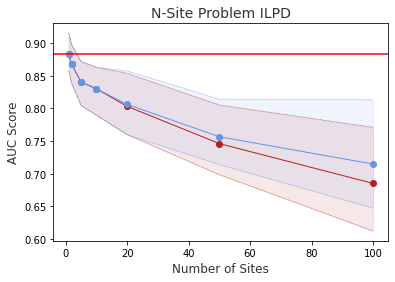

In [24]:
# Plot mean estimate as a line
plt.plot('n_', 'AUC Score_mean', data = plot_1_2, linewidth=1, alpha=1, color="firebrick", marker='o')
plt.plot('n_', 'AUC Score_25', data = plot_1_2, linewidth=0.5, alpha=0.7, color="firebrick", linestyle='--')
plt.plot('n_', 'AUC Score_75', data = plot_1_2, linewidth=0.5, alpha=0.7, color="firebrick", linestyle='--')

# Fill between the upper and lower bands
plt.fill_between(x = 'n_', 
                 y1 = 'AUC Score_25', y2 = 'AUC Score_75', 
                 data = plot_1_2, alpha=0.1, color="firebrick")

plt.plot('n_', 'AUC Score_mean', data = plot_1_3, linewidth=1, alpha=1, color="cornflowerblue", marker='o')
plt.plot('n_', 'AUC Score_25', data = plot_1_3, linewidth=0.5, alpha=0.7, color="cornflowerblue", linestyle='--')
plt.plot('n_', 'AUC Score_75', data = plot_1_3, linewidth=0.5, alpha=0.7, color="cornflowerblue", linestyle='--')

# Fill between the upper and lower bands
plt.fill_between(x = 'n_', 
                 y1 = 'AUC Score_25', y2 = 'AUC Score_75', 
                 data = plot_1_3, alpha=0.1, color="cornflowerblue")

plt.axhline(y=0.883067, color='r', linestyle='-')

plt.title("N-Site Problem ILPD", alpha=0.8, fontsize=14)
plt.xlabel("Number of Sites", alpha=0.8, fontsize=12)
plt.ylabel("AUC Score", alpha=0.8, fontsize=12)

plt.show()


### Vis 2: Inter-Site Sample Size Imbalance

In [88]:
path_2_2_u = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_2_2_unweighted.csv"
path_2_2_w = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_2_2_weighted.csv"
path_2_3_u = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_2_3_unweighted.csv"
path_2_3_w = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_2_3_weighted.csv"

df_2_2_u = pd.read_csv(path_2_2_u, index_col=False).groupby(['Degree Imbalance']).agg('mean').reset_index()
df_2_2_w = pd.read_csv(path_2_2_w, index_col=False).groupby(['Degree Imbalance']).agg('mean').reset_index()
df_2_3_u = pd.read_csv(path_2_3_u, index_col=False).groupby(['Degree Imbalance']).agg('mean').reset_index()
df_2_3_w = pd.read_csv(path_2_3_w, index_col=False).groupby(['Degree Imbalance']).agg('mean').reset_index()

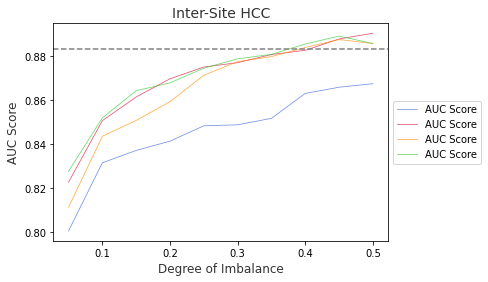

In [93]:
# Plot mean estimate as a line
# plt.plot('n_', 'AUC Score_mean', data = plot_1_2, linewidth=1, alpha=1, color="crimson", marker='o')
plt.plot('Degree Imbalance', 'AUC Score', data = df_2_2_u, linewidth=0.8, alpha=0.7, color="royalblue", linestyle='-')
plt.plot('Degree Imbalance', 'AUC Score', data = df_2_2_w, linewidth=0.8, alpha=0.7, color="crimson", linestyle='-')
plt.plot('Degree Imbalance', 'AUC Score', data = df_2_3_u, linewidth=0.8, alpha=0.7, color="darkorange", linestyle='-')
plt.plot('Degree Imbalance', 'AUC Score', data = df_2_3_w, linewidth=0.8, alpha=0.7, color="limegreen", linestyle='-')

plt.axhline(y=0.883067, color='grey', linestyle='--')

plt.title("Inter-Site HCC", alpha=0.8, fontsize=14)
plt.xlabel("Degree of Imbalance", alpha=0.8, fontsize=12)
plt.ylabel("AUC Score", alpha=0.8, fontsize=12)

plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()


### Vis 3: Communication Efficiency

In [34]:
path_comm_effi = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_ILPD_comm_effi.csv"
df_comm_effi = pd.read_csv(path_comm_effi, index_col=False)

In [35]:
df_comm_effi.n.unique()

array([ 1,  2,  5, 10])

In [ ]:
nrow = 2
ncol = 2

fig, axs = plt.subplots(nrow, ncol)
for i, ax in enumerate(fig.axes):
    # ax.set_ylabel(str(i))
    print(i)
    print(ax)

# plt.show()

In [66]:
# df.groupby(['r', 'v', 'n', 'e']).agg(["mean", "median", "var"]).reset_index()
df = df_comm_effi.groupby(['r', 'n', 'e']).agg(["mean", "var"]).reset_index()
df.columns = ['_'.join(col) for col in df.columns]

df

,r_,n_,e_,s_mean,s_var,v_mean,v_var,F_1 Score_mean,F_1 Score_var,MCC Score_mean,MCC Score_var,AUC Score_mean,AUC Score_var,ACC Score_mean,ACC Score_var
0,1,1,1,50.5,841.666667,1.0,0.000000,0.828283,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000
1,1,1,2,50.5,841.666667,1.0,0.000000,0.821207,0.000848,0.013045,0.002859,0.507037,0.000833,0.507037,0.000833
2,1,1,5,50.5,841.666667,1.0,0.000000,0.780303,0.002599,0.116149,0.019182,0.556765,0.004590,0.556765,0.004590
3,1,1,10,50.5,841.666667,1.0,0.000000,0.790006,0.001487,0.174194,0.016662,0.575825,0.003698,0.575825,0.003698
4,1,2,1,50.5,837.437186,1.5,0.251256,0.824716,0.000441,0.004438,0.000726,0.502353,0.000203,0.502353,0.000203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,5,5,10,50.5,833.583433,13.0,52.020808,0.767646,0.002278,0.147399,0.021472,0.569624,0.004815,0.569624,0.004815
76,5,10,1,50.5,833.416683,25.5,208.291658,0.746099,0.008017,0.141838,0.021840,0.572475,0.005638,0.572475,0.005638
77,5,10,2,50.5,833.416683,25.5,208.291658,0.766385,0.005130,0.125277,0.019261,0.559241,0.004041,0.559241,0.004041
78,5,10,5,50.5,833.416683,25.5,208.291658,0.750133,0.003638,0.127768,0.018669,0.561421,0.004011,0.561421,0.004011


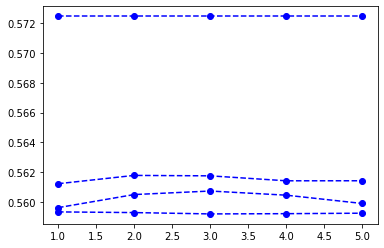

In [69]:
#df[(df["n_"] == 10) & (df["e_"] == 2)]["v"]

# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot Seattle data, setting data appearance
ax.plot(df[(df["n_"] == 10) & (df["e_"] == 1)]["r_"], df[(df["n_"] == 10) & (df["e_"] == 1)]["AUC Score_mean"], color='b', marker='o', linestyle='--')
ax.plot(df[(df["n_"] == 10) & (df["e_"] == 2)]["r_"], df[(df["n_"] == 10) & (df["e_"] == 2)]["AUC Score_mean"], color='b', marker='o', linestyle='--')
ax.plot(df[(df["n_"] == 10) & (df["e_"] == 5)]["r_"], df[(df["n_"] == 10) & (df["e_"] == 5)]["AUC Score_mean"], color='b', marker='o', linestyle='--')
ax.plot(df[(df["n_"] == 10) & (df["e_"] == 10)]["r_"], df[(df["n_"] == 10) & (df["e_"] == 10)]["AUC Score_mean"], color='b', marker='o', linestyle='--')

# Call show to display the resulting plot
plt.show()

In [70]:
path = "/Users/greg/Downloads/AR_Master_Thesis/data/creditcard.csv"
data = pd.read_csv(path)
data.shape

(284807, 31)

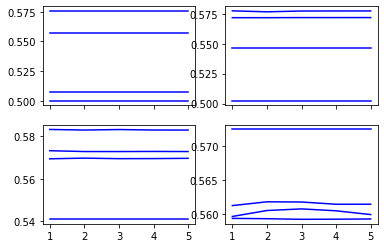

In [79]:
plt.style.use("tableau-colorblind10")

fig, ax = plt.subplots(2, 2, sharey=False, sharex=True)

# for i, ax in enumerate(fig.axes):
#     ax.set_xlabel(str(ax))
#     ax.set_ylabel(str(i))

ax[0, 0].plot(df[(df["n_"] == 1) & (df["e_"] == 1)]["r_"], df[(df["n_"] == 1) & (df["e_"] == 1)]["AUC Score_mean"], color='b')
ax[0, 0].plot(df[(df["n_"] == 1) & (df["e_"] == 2)]["r_"], df[(df["n_"] == 1) & (df["e_"] == 2)]["AUC Score_mean"], color='b')
ax[0, 0].plot(df[(df["n_"] == 1) & (df["e_"] == 5)]["r_"], df[(df["n_"] == 1) & (df["e_"] == 5)]["AUC Score_mean"], color='b')
ax[0, 0].plot(df[(df["n_"] == 1) & (df["e_"] == 10)]["r_"], df[(df["n_"] == 1) & (df["e_"] == 10)]["AUC Score_mean"], color='b')

ax[0, 1].plot(df[(df["n_"] == 2) & (df["e_"] == 1)]["r_"], df[(df["n_"] == 2) & (df["e_"] == 1)]["AUC Score_mean"], color='b')
ax[0, 1].plot(df[(df["n_"] == 2) & (df["e_"] == 2)]["r_"], df[(df["n_"] == 2) & (df["e_"] == 2)]["AUC Score_mean"], color='b')
ax[0, 1].plot(df[(df["n_"] == 2) & (df["e_"] == 5)]["r_"], df[(df["n_"] == 2) & (df["e_"] == 5)]["AUC Score_mean"], color='b')
ax[0, 1].plot(df[(df["n_"] == 2) & (df["e_"] == 10)]["r_"], df[(df["n_"] == 2) & (df["e_"] == 10)]["AUC Score_mean"], color='b')

ax[1, 0].plot(df[(df["n_"] == 5) & (df["e_"] == 1)]["r_"], df[(df["n_"] == 5) & (df["e_"] == 1)]["AUC Score_mean"], color='b')
ax[1, 0].plot(df[(df["n_"] == 5) & (df["e_"] == 2)]["r_"], df[(df["n_"] == 5) & (df["e_"] == 2)]["AUC Score_mean"], color='b')
ax[1, 0].plot(df[(df["n_"] == 5) & (df["e_"] == 5)]["r_"], df[(df["n_"] == 5) & (df["e_"] == 5)]["AUC Score_mean"], color='b')
ax[1, 0].plot(df[(df["n_"] == 5) & (df["e_"] == 10)]["r_"], df[(df["n_"] == 5) & (df["e_"] == 10)]["AUC Score_mean"], color='b')

ax[1, 1].plot(df[(df["n_"] == 10) & (df["e_"] == 1)]["r_"], df[(df["n_"] == 10) & (df["e_"] == 1)]["AUC Score_mean"], color='b')
ax[1, 1].plot(df[(df["n_"] == 10) & (df["e_"] == 2)]["r_"], df[(df["n_"] == 10) & (df["e_"] == 2)]["AUC Score_mean"], color='b')
ax[1, 1].plot(df[(df["n_"] == 10) & (df["e_"] == 5)]["r_"], df[(df["n_"] == 10) & (df["e_"] == 5)]["AUC Score_mean"], color='b')
ax[1, 1].plot(df[(df["n_"] == 10) & (df["e_"] == 10)]["r_"], df[(df["n_"] == 10) & (df["e_"] == 10)]["AUC Score_mean"], color='b')

#ax[0, 0].set_ylabel("Precipitation (inches)")
#ax[1, 1].set_ylabel("Precipitation (inches)")
#ax[1, 1].set_xlabel("Time (months)")


plt.show()

In [ ]:
plt.style.use("tableau-colorblind10")
fig, ax = plt.subplots(2, 2, sharey=True) # Sharing the y-axis range

# Decrase interval thickness as interval widens
sizes =      [      15,    10,     5]
int_widths = ['90% CI', '95%', '99%']
z_scores =   [    1.67,  1.96,  2.58]

for percent, Z, size in zip(int_widths, z_scores, sizes):
    plt.hlines(y = rocket_model.pollutant, 
               xmin = rocket_model['est'] - Z*rocket_model['std_err'],
               xmax = rocket_model['est'] + Z*rocket_model['std_err'],
               label = percent, 
               # Resize lines and color them gray
               linewidth = size, 
               color = 'gray') 
    
# Add point estimate
plt.plot('est', 'pollutant', 'wo', data = rocket_model, label = 'Point Estimate')

plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

In [ ]:
"""         plt.ioff()
        plt.figure()

        plt.plot(local_metric.number_sites,
                 local_metric["25%"], linewidth=1, alpha=0.7, color="firebrick")
        plt.plot(local_metric.number_sites,
                 local_metric["75%"], linewidth=1, alpha=0.7, color="firebrick")
        plt.plot(local_metric.number_sites,
                 local_metric["mean"], linewidth=1, alpha=1, color="firebrick")
        plt.fill_between(local_metric.number_sites, local_metric["25%"],
                         local_metric["75%"], alpha=0.3, color="firebrick")

        plt.plot(global_metric.number_sites,
                 global_metric["25%"], linewidth=1, alpha=0.7, color="cornflowerblue")
        plt.plot(global_metric.number_sites,
                 global_metric["75%"], linewidth=1, alpha=0.7, color="cornflowerblue")
        plt.plot(global_metric.number_sites,
                 global_metric["mean"], linewidth=1, alpha=1, color="cornflowerblue")
        plt.fill_between(global_metric.number_sites, global_metric["25%"],
                         global_metric["75%"], alpha=0.3, color="cornflowerblue")

        sct1 = plt.scatter(global_metric.number_sites,
                           global_metric["mean"], color="cornflowerblue", marker="o", s=20)
        sct2 = plt.scatter(local_metric.number_sites,
                           local_metric["mean"], color="firebrick", marker="o", s=20)

        title = dataset_name + " - " + method + " method, " + \
            str(int(fraction*100)) + " % of features dropped"
        plt.title(title, alpha=0.8, fontsize=14)
        plt.xlabel("Number of Sites", alpha=0.8, fontsize=12)
        plt.ylabel(metric_name, alpha=0.8, fontsize=12) """